In [393]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [394]:
V0 = 15
tp = 0.11
Tme = 873.2
Tve = 742.9

In [395]:
# Time
dt = 1e-4
t = np.arange(dt,1.11+dt,dt)
# Power funciton
wv = np.zeros(len(t))
a = 0.003
b = tp
c = 1e-5
d = 1.1

for i in range(len(t)):
    if t[i] < 0.01:
        wv[i] = c
    elif (0.01 <= t[i]) & (t[i] < (0.01+a/2)):
        wv[i] = c + 2/a**2*(t[i]-0.01)**2
    elif (0.01+a/2 <= t[i]) & (t[i] < (0.01+a)):
        wv[i] = c + -2/a**2*(t[i]-0.01-a)**2+1
    elif ((0.01+a) <= t[i]) & (t[i] < (0.01+b-a)):
        wv[i] = c + 1
    elif ((0.01+b-a) <= t[i]) & (t[i] < (0.01+b-a/2)):
        wv[i] =c + -2/a**2*(t[i]-0.01-b+a)**2+1
    elif ((0.01+b-a/2) <= t[i]) & (t[i] < (0.01+b)):
        wv[i] =c + 2/a**2*(t[i]-0.01-b)**2
    else:
        wv[i] = c

V = V0 * wv
P = V**2/4.418081

# heat transfer
T0 = 730





In [396]:
def heat_balance(x):
    kh = x[0]
    Cp = kh*0.010783 #J/K
    ht = x[1]
    T = np.zeros(len(t))+T0
    Q = np.zeros(len(t))
    
    for i in range(len(Q)-1):
        dQ = (T[i]-T0)
        if dQ <= 0:
            dQ = 1e-6
        Q = P[i]*(dt) - ht*dQ*(dt)
        T[i+1] = Q/Cp + T[i]

    return T

In [397]:
def lsq(x):
    T = heat_balance(x)
    return ((T[np.argmax(T)]-Tme)/Tme)**2 + ((np.average(T)-Tve)/(Tve))**2

In [398]:
x0 = [0.70532272 ,0.04197847]
bounds= [(0.001,3),(1e-5,0.5)]
res = minimize(lsq,x0,bounds=bounds)

In [399]:

print(res.fun)
print(res.x)

1.1901747319473636e-06
[0.39297686 0.35586413]


[730.         729.99999999 729.99999998 ... 730.00000001 730.00000001
 730.00000001]


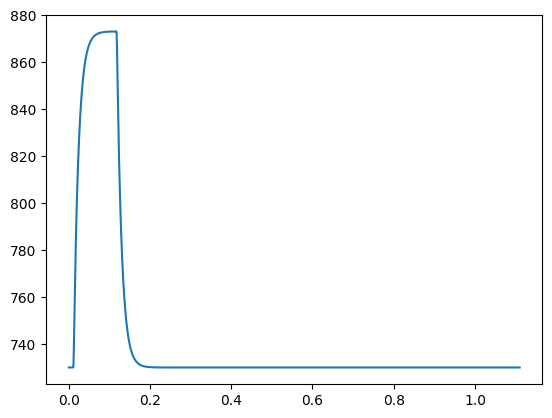

873.0910090993916
743.7051457009389
1.4460959459459455


In [400]:
T = heat_balance(res.x)
print(T)
plt.plot(t,T)
plt.show()
print(max(T))
print(np.average(T))
print(np.average(V))
